In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [49]:
df = pd.read_csv('tennis_stats.csv')

In [54]:
df

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,Yann Marti,2010,0.41,0.66,0.23,0.45,0.50,1,0.75,8,4,0.50,7,13,0.23,0.36,12,0.67,0.45,0.53,0,1,9117,1062
1717,Mikhail Elgin,2012,0.41,0.60,0.30,0.36,0.60,3,0.60,13,5,0.54,3,9,0.33,0.43,10,0.40,0.45,0.46,16,20,89755,831
1718,Alexander Kudryavtsev,2012,0.40,0.64,0.21,0.42,0.42,4,0.25,13,4,0.54,4,14,0.07,0.29,14,0.57,0.40,0.51,0,1,44566,628
1719,Ivan Nedelko,2011,0.37,0.30,0.15,0.24,0.41,1,0.00,5,5,0.00,1,7,0.00,0.26,6,0.17,0.26,0.26,0,1,17527,264


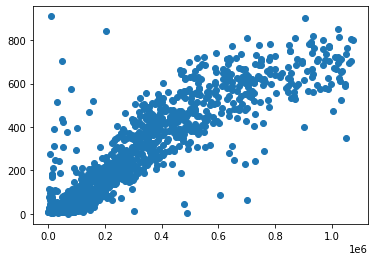

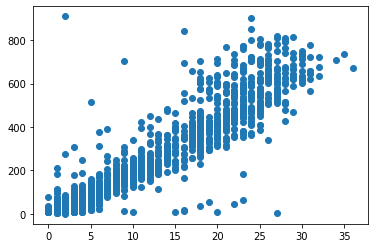

In [71]:
plt.subplot()
plt.scatter(df['Winnings'],df['ReturnGamesPlayed'])
plt.show()
plt.close()
plt.subplot()
plt.scatter(df['Losses'],df['ReturnGamesPlayed'])
plt.show()

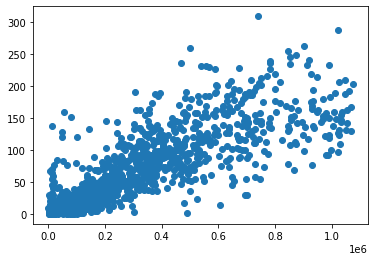

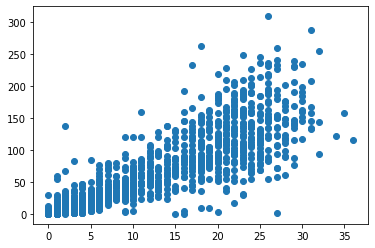

In [72]:
plt.subplot()
plt.scatter(df['Winnings'],df['DoubleFaults'])
plt.show()
plt.close()
plt.subplot()
plt.scatter(df['Losses'],df['DoubleFaults'])
plt.show()

Predicting Losses with ReturnGamesPlayed Test Score: 0.8956285897530755


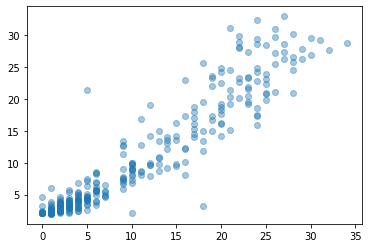

Predicting Wins with ReturnGamesPlayed Test Score: 0.8640223545420164


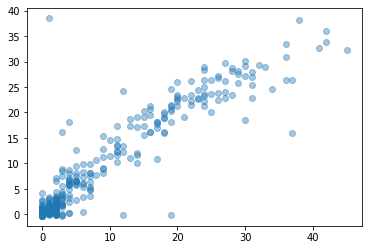

<Figure size 432x288 with 0 Axes>

In [78]:
features = df[['ReturnGamesPlayed']]
outcome = df[['Losses']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)


model = LinearRegression()
model.fit(features_train,outcome_train)

print('Predicting Losses with ReturnGamesPlayed Test Score:', model.score(features_test,outcome_test))

prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)

plt.show()
plt.clf()



features = df[['ReturnGamesPlayed']]
outcome = df[['Wins']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)


model = LinearRegression()
model.fit(features_train,outcome_train)

print('Predicting Wins with ReturnGamesPlayed Test Score:', model.score(features_test,outcome_test))

prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)

plt.show()

plt.clf()



Predicting Winnings with 2 Features Test Score: 0.8628625287855916


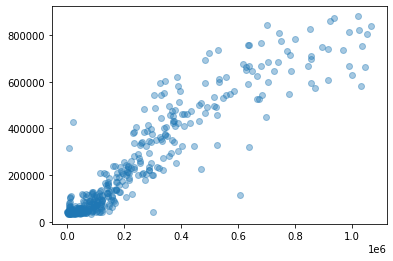

<Figure size 432x288 with 0 Axes>

In [79]:
features1 = df[['ReturnGamesPlayed',
'DoubleFaults']]
outcome1 = df[['Winnings']]

features_train, features_test, winnings_train, winnings_test = train_test_split(features1, outcome1, train_size = 0.75)

model1 = LinearRegression()
model1.fit(features_train,winnings_train)
print('Predicting Winnings with 2 Features Test Score:', model1.score(features_test,winnings_test))
winnings_prediction = model1.predict(features_test)

plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.show()
plt.clf()



Predicting Winnings with Multiple Features Test Score: 0.7853126875081661


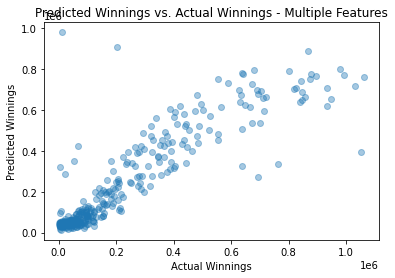

<Figure size 432x288 with 0 Axes>

In [80]:
features = df[['ReturnGamesPlayed','DoubleFaults','FirstServeReturnPointsWon','SecondServePointsWon','SecondServeReturnPointsWon','Aces','BreakPointsConverted']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()